# 15.077: Problem Set 3

Alex Berke (aberke)


From 

Rice, J.A., Mathematical Statistics and Data Analysis (with CD Data Sets), 3rd ed., Duxbury, 2007 (ISBN 978-0-534-39942-9).


In [350]:
%config Completer.use_jedi = False # autocomplete

import math
import numpy as np
import pandas as pd
import scipy.special
from scipy import stats
from sklearn.utils import resample


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Problems

### 10.48
In 1970, Congress instituted a lottery for the military draft to support the unpopular war in Vietnam. All 366 possible birth dates were placed in plastic capsules in a rotating drum and were selected one by one. Eligible males born on the first day drawn were first in line to be drafted followed by those born on the second day drawn, etc. The results were criticized by some who claimed that government incompetence at running a fair lottery resulted in a tendency of men born later in the year being more likely to be drafted. Indeed, later investigation revealed that the birthdates were placed in the drum by month and were not thoroughly mixed. The columns of the file 1970lottery are month, month number, day of the year, and draft number.

In [526]:
lottery = pd.read_csv('1970lottery.txt')
lottery.columns = [c.replace("'", "") for  c  in lottery.columns]
lottery['Month'] = lottery['Month'].apply(lambda m: m.replace("'", ""))
lottery.head()

,Month,Month_Number,Day_of_year,Draft_No
0,Jan,1,1,305
1,Jan,1,2,159
2,Jan,1,3,251
3,Jan,1,4,215
4,Jan,1,5,101


#### A. Plot draft number versus day number. Do you see any trend?

No, a trend is not clear from a simple  plot with these two  variables.

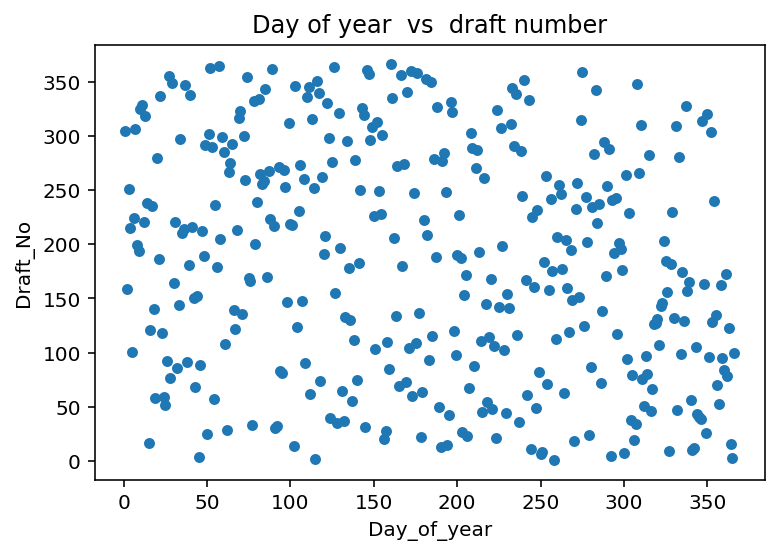

In [296]:
_ = lottery.plot.scatter('Day_of_year', 'Draft_No', title='Day of year  vs  draft number')

#### B. Calculate the Pearson and rank correlation coefficients. What do they suggest?

Both correlation coefficcients suggest there could be a relationship that is not immediately visible.

In [305]:
print('Pearson correlation coefficient: %0.4f' % (
    stats.pearsonr(lottery['Draft_No'], lottery['Day_of_year'])[0]))
print('Spearman rank correlation coefficient: %0.4f' % (
    stats.spearmanr(lottery['Draft_No'], lottery['Day_of_year'])[0]))

Pearson correlation coefficient: -0.2260
Spearman rank correlation coefficient: -0.2258


#### C. Is the correlation statistically significant? One way to assess this is via a permutation test. Randomly permute the draft numbers and find the correlation of this random permutation with the day numbers. Do this 100 times and see how many of the resulting correlation coefficients exceed the one observed in the data. If you are not satisfied with 100 times, do it 1,000 times.

The correlation does appear statistically significant.

This is because after 1000 iterations of randomly permuting the draft numbers and computing correlation coefficients between those draft numbers and day numbers, we compute the 95% CI for these correlations (see below) and  see that the true correlation coefficients fall outside  these confidence intervals.

Pearson correlation coefficient 95% CI for randomly permuted draft numbers vs day:
(-0.0044, 0.0019)

Spearman rank correlation coefficient 95% CI for randomly permuted draft numbers vs day:
(-0.0044, 0.0019)

True correlation coefficients:

Pearson correlation coefficient: -0.2260

Spearman rank correlation coefficient: -0.2258

In [330]:
iterations = 1000

pearson_coefficients =  []
rank_coefficients = []
for i in range(iterations):
    permuted_draft_no = np.random.permutation(lottery['Draft_No'])
    pearson_coefficients += [stats.pearsonr(permuted_draft_no, lottery['Day_of_year'])[0]]
    rank_coefficients += [stats.spearmanr(permuted_draft_no, lottery['Day_of_year'])[0]]

print('Pearson correlation coefficient 95% CI for randomly permuted draft numbers vs day:')
print('(%0.4f, %0.4f)' % stats.t.interval(0.95, len(pearson_coefficients)-1,
                 loc=np.mean(pearson_coefficients), 
                 scale=stats.sem(pearson_coefficients)))
print('Spearman rank correlation coefficient 95% CI for randomly permuted draft numbers vs day:')
print('(%0.4f, %0.4f)' % stats.t.interval(0.95, len(rank_coefficients)-1,
                 loc=np.mean(rank_coefficients), 
                 scale=stats.sem(rank_coefficients)))

Pearson correlation coefficient 95% CI for randomly permuted draft numbers vs day:
(-0.0044, 0.0019)
Spearman rank correlation coefficient 95% CI for randomly permuted draft numbers vs day:
(-0.0044, 0.0019)


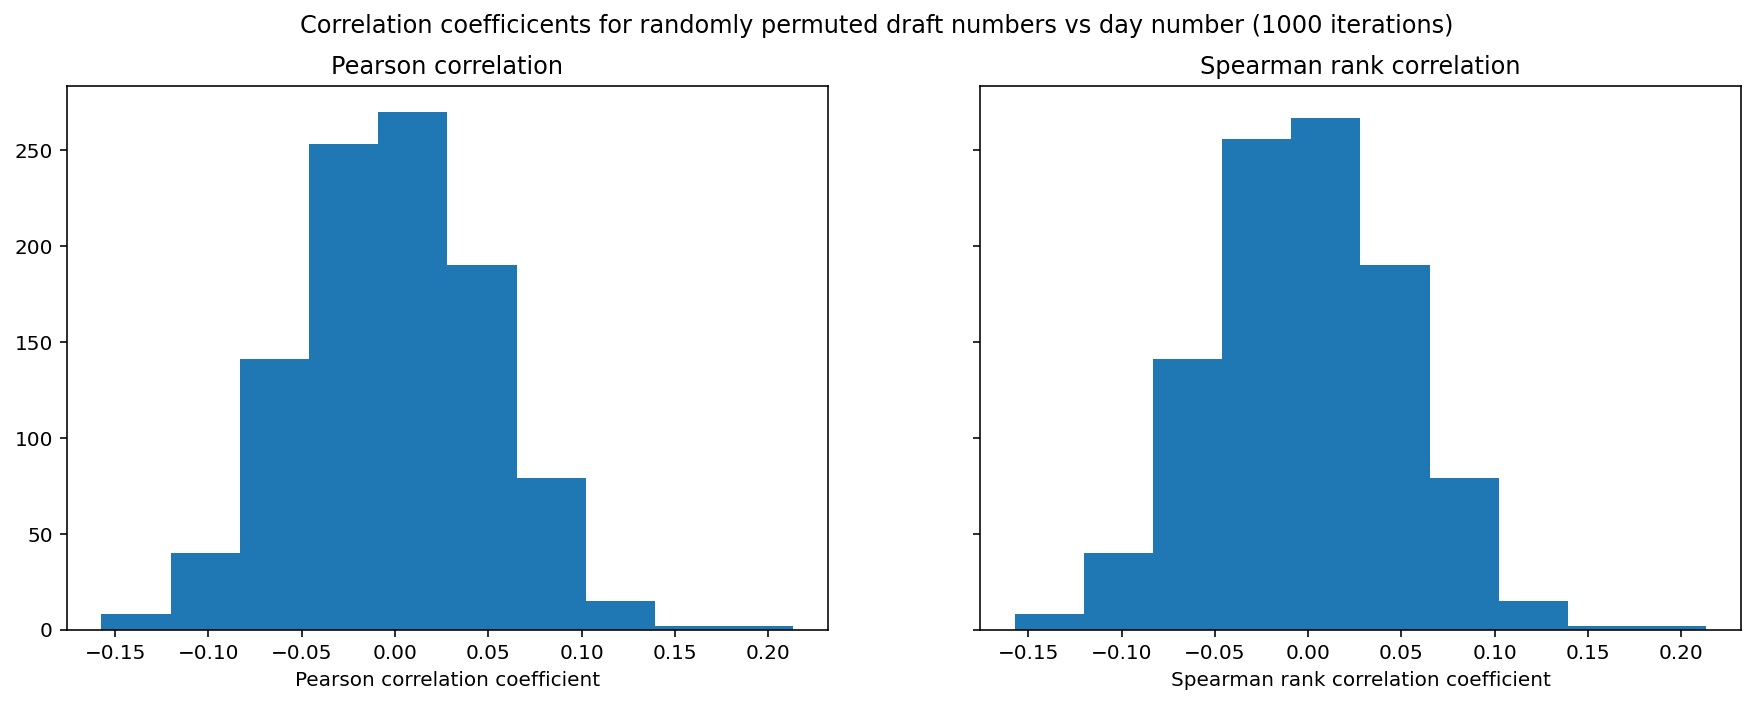

In [331]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Correlation coefficicents for randomly permuted draft numbers vs day number (%s iterations)' % iterations)
ax[0].hist(pearson_coefficients)
ax[1].hist(rank_coefficients)
ax[0].set_title('Pearson correlation')
ax[1].set_title('Spearman rank correlation')
ax[0].set_xlabel('Pearson correlation coefficient')
_ = ax[1].set_xlabel('Spearman rank correlation coefficient')

#### D.  Make parallel boxplots of the draft numbers by month. Do you see any pattern? 

The mean draft numbers are lowest in the (later) months  of November  and December.

<AxesSubplot:>

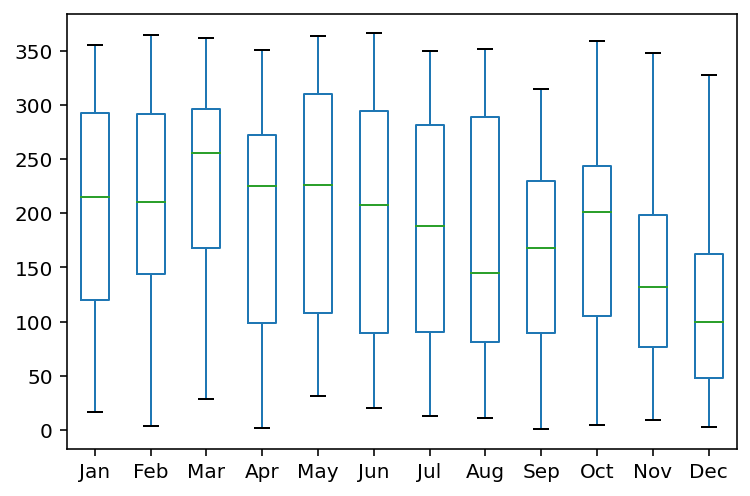

In [349]:
pd.DataFrame(
    {m: lottery[lottery['Month']==m]['Draft_No'] for m in months.values()}
).boxplot(grid=False)

#### E. Examine  the sampling variability of the two  correlation coefficients (Pearson and rank) using the bootstrap (re-sampling  pairs with replacement) with 100 (or 1000) bootstrap samples.   How does this  compare with the permutation approach?

The results are drastically different from the results  of the permutation approach. 

The  random permutation correlation coefficients were (as expected) centered around a mean of 0. 

The bootstrap Pearson and Rank correlation coefficient values are both  around -0.22.
The 95% CIs for the bootstrap vs permutation method values do not overlap.


Pearson correlation coefficient 95% CI for (1000) bootstrap samples:
(-0.2292, -0.2231)
Spearman rank correlation coefficient 95% CI for (1000) bootstrap samples:
(-0.2285, -0.2224)


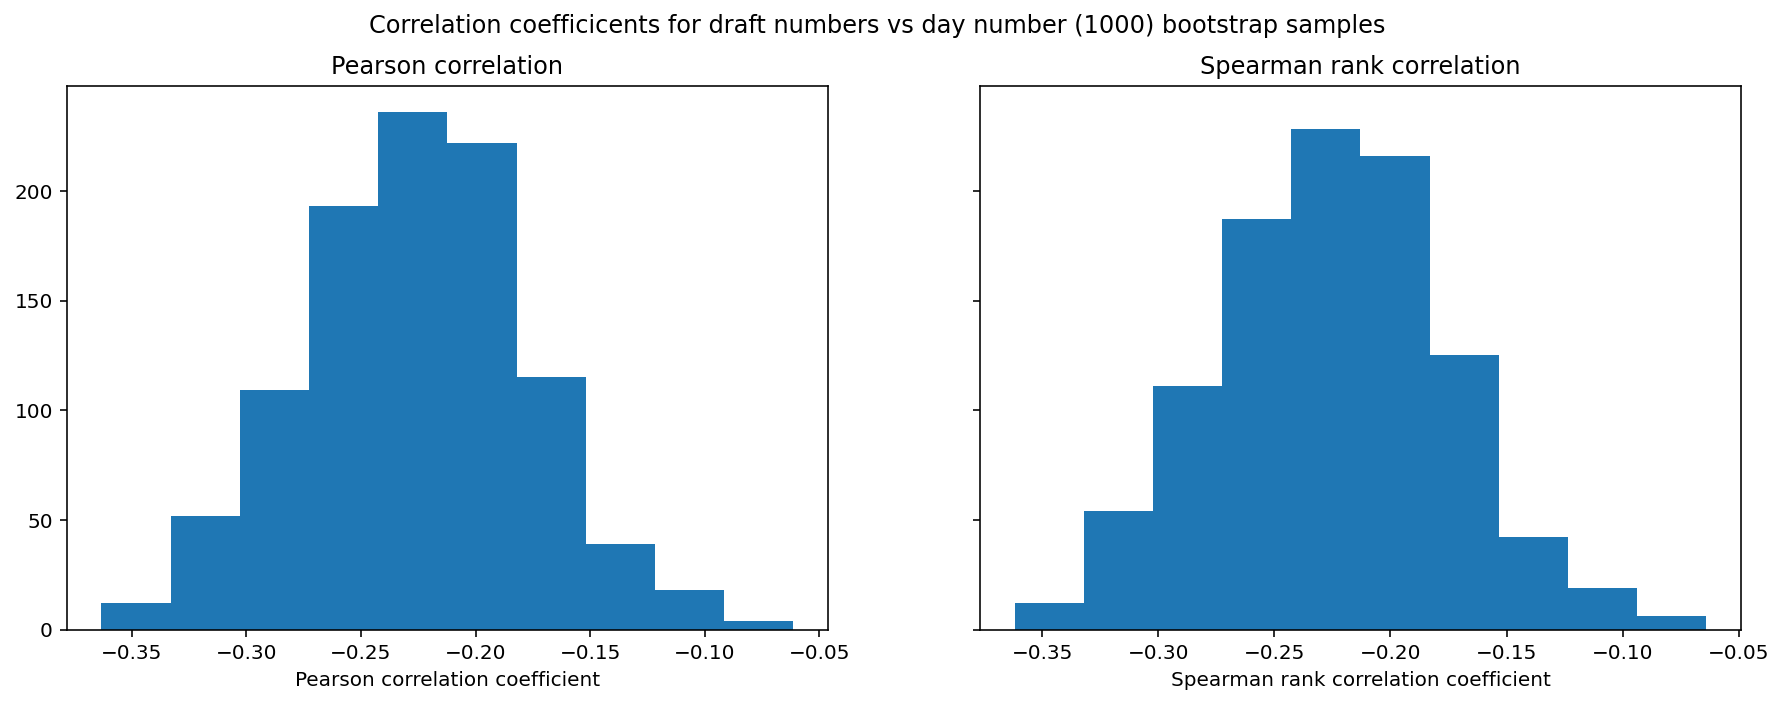

In [352]:
pearson_coefficients =  []
rank_coefficients = []
for i in range(iterations):
    resampled = resample(lottery)
    pearson_coefficients += [stats.pearsonr(resampled['Draft_No'], resampled['Day_of_year'])[0]]
    rank_coefficients += [stats.spearmanr(resampled['Draft_No'], resampled['Day_of_year'])[0]]

print('Pearson correlation coefficient 95%% CI for (%s) bootstrap samples:'  % iterations)
print('(%0.4f, %0.4f)' % stats.t.interval(0.95, len(pearson_coefficients)-1,
                 loc=np.mean(pearson_coefficients), 
                 scale=stats.sem(pearson_coefficients)))
print('Spearman rank correlation coefficient 95%% CI for (%s) bootstrap samples:'  % iterations)
print('(%0.4f, %0.4f)' % stats.t.interval(0.95, len(rank_coefficients)-1,
                 loc=np.mean(rank_coefficients), 
                 scale=stats.sem(rank_coefficients)))

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Correlation coefficicents for draft numbers vs day number (%s) bootstrap samples' % iterations)
ax[0].hist(pearson_coefficients)
ax[1].hist(rank_coefficients)
ax[0].set_title('Pearson correlation')
ax[1].set_title('Spearman rank correlation')
ax[0].set_xlabel('Pearson correlation coefficient')
_ = ax[1].set_xlabel('Spearman rank correlation coefficient')

### 11.15 
#### Suppose that n measurements are to be taken under a treatment condition and another n measurements are to be taken independently under a control condition. It is thought that the standard deviation of a single observation is about 10 under both conditions. How large should n be so that a 95% confidence interval for μX − μY has a width of 2? Use the normal distribution rather than the t distribution, since n will turn out to be rather large. 


find: n control = n treatment

σ = 10

|μX − μY| = 2

α = 0.05


From Rice 11.2.1: 
Since we are using the normal distribution, and  σ is  assumed, a confidence interval for (μX − μY) can be based on:

$Z = \frac{(\bar{X} - \bar{Y}) - (μX − μY)}{\sigma \sqrt{\frac{1}{n} + \frac{1}{m}}} = \frac{(\bar{X} - \bar{Y}) - (μX − μY)}{\sigma \sqrt{\frac{2}{n}}} $



The confidence interval is  then of form:

$ (\bar{X} - \bar{Y})  \pm z_{α/2} \sigma \sqrt{\frac{2}{n}}  $

Since the confidence interval is symmetric around $ (\bar{X} - \bar{Y})$  and  its width is  2 we have:

$ 2 = 2 (z_{α/2}) \sigma \sqrt{\frac{2}{n}}  $

rearranging terms we have:

$ n =  ((z_{α/2})\sigma \sqrt{2} )^2 = (1.96)^2 (10)^2 2 = 768.32$

i.e. n= 768


### 11.16
#### Referring to Problem 15, how large should n be so that the test of H0: μX = μY against the one-sided alternative HA : μX > μY has a power of .5 if μX − μY = 2 and α = .10?


find: n control = n treatment

σ = 10

α = 0.05

Δ = (μX − μY) = 2

Based on Rice 11.2.2 this is  a problem  in  solving:

$ 1 - \beta = 0.5 = 1 - Φ[z(\alpha) - \frac{Δ}{\sigma}\sqrt{\frac{n}{2}}] $

Rearranging we have:

$ 0.5 = Φ[z(\alpha) - \frac{Δ}{\sigma}\sqrt{\frac{n}{2}}] $

Since $0.5 = Φ(0)$ this means solving for n where:

$0 = z(\alpha) - \frac{Δ}{\sigma}\sqrt{\frac{n}{2}}$

$ \frac{Δ}{\sigma}\sqrt{\frac{n}{2}} = z(\alpha)$

$ n = (z(\alpha)\frac{\sigma}{Δ} \sqrt{2})^2 = (1.28)^2 (\frac{10}{2})^2 2 = 81.92 $

i.e. n = 82

### 11.39
#### An experiment was done to test a method for reducing faults on telephone lines (Welch 1987). Fourteen matched pairs of areas were used. The following table shows the fault rates for the control areas and for the test areas: 

In [89]:
l = "676 88 206 570 230 605 256 617 280 653 433 2913 337 924 466 286 497 1098 512 982 794 2346 428 321 452 615 512 519".split(" ")
df = pd.DataFrame({
    'test':  l[::2],
    'control': l[1::2],
}).astype(int)
df

,test,control
0,676,88
1,206,570
2,230,605
3,256,617
4,280,653
5,433,2913
6,337,924
7,466,286
8,497,1098
9,512,982


#### A. Plot the differences versus the control rate and summarize what you see.

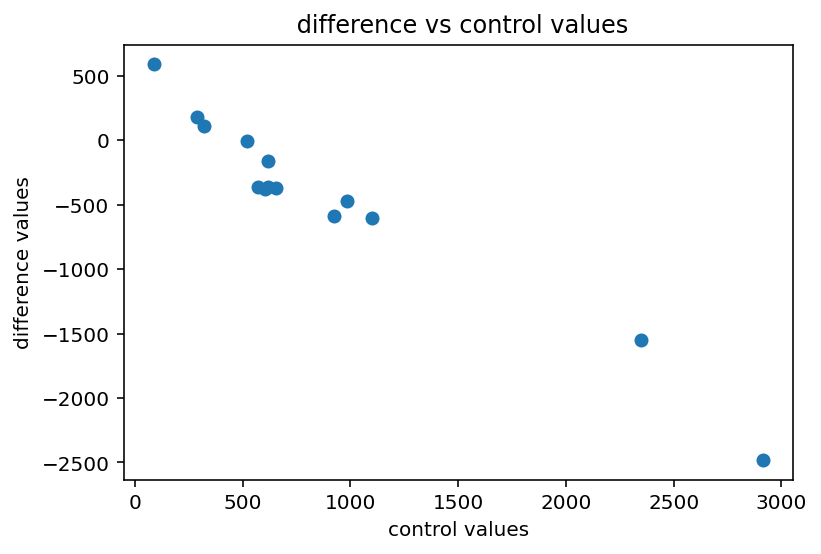

In [235]:
differences = df['test'] - df['control']
plt.scatter(df['control'], differences)
plt.xlabel('control values')
plt.ylabel('difference values')
_ = plt.title(' difference vs control values')

The difference values decrease  as the control values increase. This relationship appears linear.

#### B. Calculate the mean difference, its standard deviation,  and a confidence interval.

Let $D_i$ be the  difference value.

From Rice Section 11.3.1, a 100(1 − α)% confidence interval for $μ_D$ is

$ \bar{D} \pm t_{n-1}(α/2)s_{\bar{D}}$

And from class  slides “Samples” (slide 44):

$s_{\bar{D}}^2 = \frac{1}{n (n - 1)} \sum{(D_i - \bar{D})^2} $

In [243]:
mean_D = differences.mean()
print('The mean difference ~ %s' % round(mean_D, 2))

The mean difference ~ -461.29


In [245]:
n = len(differences)
std = np.sqrt((1/((n-1)*(n)))*(((differences - mean_D)**2).sum()))
print('The standard deviation ~ %s' % round(std,  2))

The standard deviation ~ 202.53


Since $n = 14$ and  $t_{13}(0.025) = 2.160$, a 95% confidence interval for the mean difference is

$ -461.29 \pm (437.46) =  -461.29 \pm (2.160 \times 202.53) = \bar{D} \pm t_{n-1}(α/2)s_{\bar{D}}$

In [256]:
print('95%% CI (%s , %s)'  % (round(mean_D  - (2.160 * std),  2), round(mean_D + (2.160 * std), 2)))

95% CI (-898.76 , -23.81)


#### C. Calculate the median difference and a confidence interval and compare to the previous result.


Based on Rice section 10.4: We can sort the values, and find the median and find confidence intervals around that median by using a binomial distribution.

In [116]:
sorted_differences = sorted(differences)
print('sorted difference values:', sorted_differences)
median = np.median(sorted_differences)
print('η: median value = %s' % median)

n = len(sorted_differences)
print('n = %s' % n)

sorted difference values: [-2480, -1552, -601, -587, -470, -375, -373, -364, -361, -163, -7, 107, 180, 588]
η: median value = -368.5
n = 14


We look to form  a confidence interval of the following form:

(X(k), X(n−k+1))

The coverage probability of this interval is

P(X(k) ≤ η ≤ X(n−k+1)) = = 1 − P(η < X(k)) − P(η > X(n−k+1))

The distribution of the number of observations greater than the median is binomial with n trials and probability $\frac{1}{2}$ of success on each trial. Thus,

P( j observations are greater than η) = $ \frac{1}{2^n} \binom{n}{j} $

Now I make a cumulative binomial distrbution table for

n = 14

p = 0.5

P[X ≤ k]

In [142]:
binomials = []
for i in range(int(n/2)):
    binomials += [((1/(2**n)) * sum([scipy.special.binom(n, j) for j in range(i+1)]))]

pd.Series(binomials).rename('P[X ≤ k]').to_frame()

,P[X ≤ k]
0,0.000061
1,0.000916
2,0.006470
3,0.028687
4,0.089783
5,0.211975
6,0.395264


P(X < k)= P(X > n−k+1)

We  can choose k = 4

P(X < 4) = P(X > 11) = 0.0287

Since 

$2 \times 0.0287 = 0.0574$

Then we have about a 94% confidence  interval for (X(4), X(11)) which is:

In [149]:
print('(%s, %s)' % (sorted_differences[4], sorted_differences[11]))

(-470, 107)


In  summary, the median vaue  is -368.5 with a 94% CI of (-470, 107).

In comparison, the mean value is approximately -461.29 with a 95% CI of (-898.76 , -23.81).

The mean value is lower than the median value and it has a wider confidence interval due to its larger standard deviation. The mean value and its standard deviation is clearly effected by the extreme negative values.

#### D . Do you think it is more appropriate to use a t test or a nonparametric method to test whether the apparent difference between test and control could be due to chance? Why? Carry out both tests and compare. 

A nonparametric test, namely the  Signed Rank Test would be better.  This is for the following  reasons:
-  The t test assumes the values follow a normal distribution. However, the following plots show this assumption does not hold for  the differences values.
- The differences   data has  extreme outliers and the t test is  sensitive to  outliers  while the Signed Rank Test is  not.


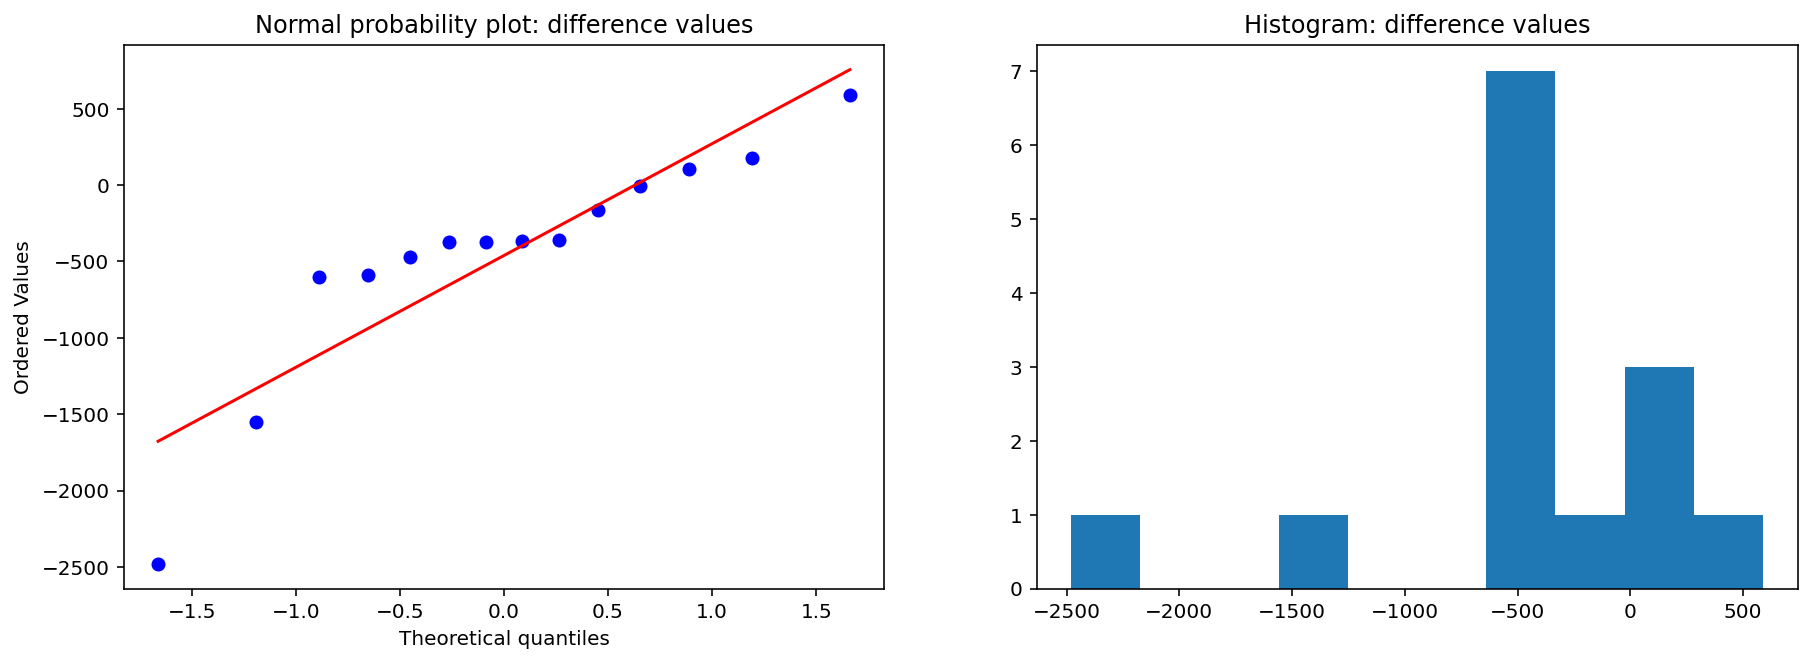

In [173]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
stats.probplot(differences.values, plot=ax0)
ax0.set_title('Normal probability plot: difference values')
ax1.hist(differences)
_ = ax1.set_title('Histogram: difference values')

##### Using a t test:

The null hypothesis is for no difference, i.e.

$H_0: μ_𝐷 = 0 $

The test statistic is then

$ t = \frac{\bar{D} - μ_𝐷}{s_{\bar{D}}} = \frac{\bar{D}}{s_{\bar{D}}} $ 

which follows a t distribution with n - 1 degrees of freedom.


In [263]:
t = (np.abs(mean_D)/std)
print('t = %s' % round(t, 3))

t = 2.278


From the t  distribution table:

$ t_{13}(0.025) = 2.160$ and $t_{13}(0.01) =  2.650 $ so the p-value of a two-sided test is less than .05 but not less than 0.02. 

##### Using The Signed Rank Test:

In [201]:
test_df = differences.rename('difference').to_frame()
test_df['|difference|'] = np.abs(test_df['difference'])
test_df = test_df.sort_values('|difference|').reset_index().drop('index', axis=1).reset_index().rename(
    columns={'index':'rank'}
)[['difference', '|difference|', 'rank']]
test_df['rank'] = test_df['rank'] + 1
test_df['signed rank'] = test_df.apply(lambda row: row['rank'] * -1 if row['difference'] < 0 else row['rank'], axis=1)
test_df

,difference,|difference|,rank,signed rank
0,-7,7,1,-1
1,107,107,2,2
2,-163,163,3,-3
3,180,180,4,4
4,-361,361,5,-5
5,-364,364,6,-6
6,-373,373,7,-7
7,-375,375,8,-8
8,-470,470,9,-9
9,-587,587,10,-10


We now calculate W+ by summing the positive ranks.

In [205]:
positive_ranks = [w for w in test_df['signed rank'] if w > 0]
print('W+ = %s' %  sum(positive_ranks))

W+ = 17


From Table 9 of Appendix B, the two-sided test is significant at α = .05, but not at α = .02.

The findings between the t test and The Unsigned  Rank test are consistent.

### 11.46
#### The National Weather Bureau’s ACN cloud-seeding project was carried out in the states of Oregon and Washington. Cloud seeding was accomplished by dispersing dry ice from an aircraft; only clouds that were deemed “ripe” for seeding were candidates for seeding. On each occasion, a decision was made at random whether to seed, the probability of seeding being 2/3. This resulted in 22 seeded and 13 control cases. Three types of targets were considered, two of which are dealt with in this problem. Type I targets were large geographical areas downwind from the seeding; type II targets were sections of type I targets located so as to have, theoretically, the greatest sensitivity to cloud seeding. The following table gives the average target rainfalls (in inches) for the seeded and control cases, listed in chronological order. Is there evidence that seeding has an effect on either type of target? 

In [227]:
control = pd.DataFrame({
    'Type I': [
        .0080, .0046, .0549, .1313, .0587, .1723, .3812, .1720, .1182, .1383, .0106, .2126, .1435,
    ],
    'Type II': [
        .0000, .0000, .0053, .0920, .0220, .1133, .2880, .0000, .1058, .2050, .0100, .2450, .1529,
    ],
})

seeded = pd.DataFrame({
    'Type I': [
        .1218, .0403, .1166, .2375, .1256, .1400, .2439, .0072, .0707, .1036, .1632, .0788, .0365, .2409, .0408, .2204, .1847, .3332, .0676, .1097, .0952, .2095,
    ],
    'Type II': [
        .0200, .0163, .1560, .2885, .1483, .1019, .1867, .0233, .1067, .1011, .2407, .0666, .0133, .2897, .0425, .2191, .0789, .3570, .0760, .0913, .0400, .1467, 
    ],
})
control

,Type I,Type II
0,0.0080,0.0000
1,0.0046,0.0000
2,0.0549,0.0053
3,0.1313,0.0920
4,0.0587,0.0220
5,0.1723,0.1133
6,0.3812,0.2880
7,0.1720,0.0000
8,0.1182,0.1058
9,0.1383,0.2050


In [228]:
seeded

,Type I,Type II
0,0.1218,0.0200
1,0.0403,0.0163
2,0.1166,0.1560
3,0.2375,0.2885
4,0.1256,0.1483
5,0.1400,0.1019
6,0.2439,0.1867
7,0.0072,0.0233
8,0.0707,0.1067
9,0.1036,0.1011


First we compare the mean values of each sample with boxplots, and check for normality  with normal probability plots.

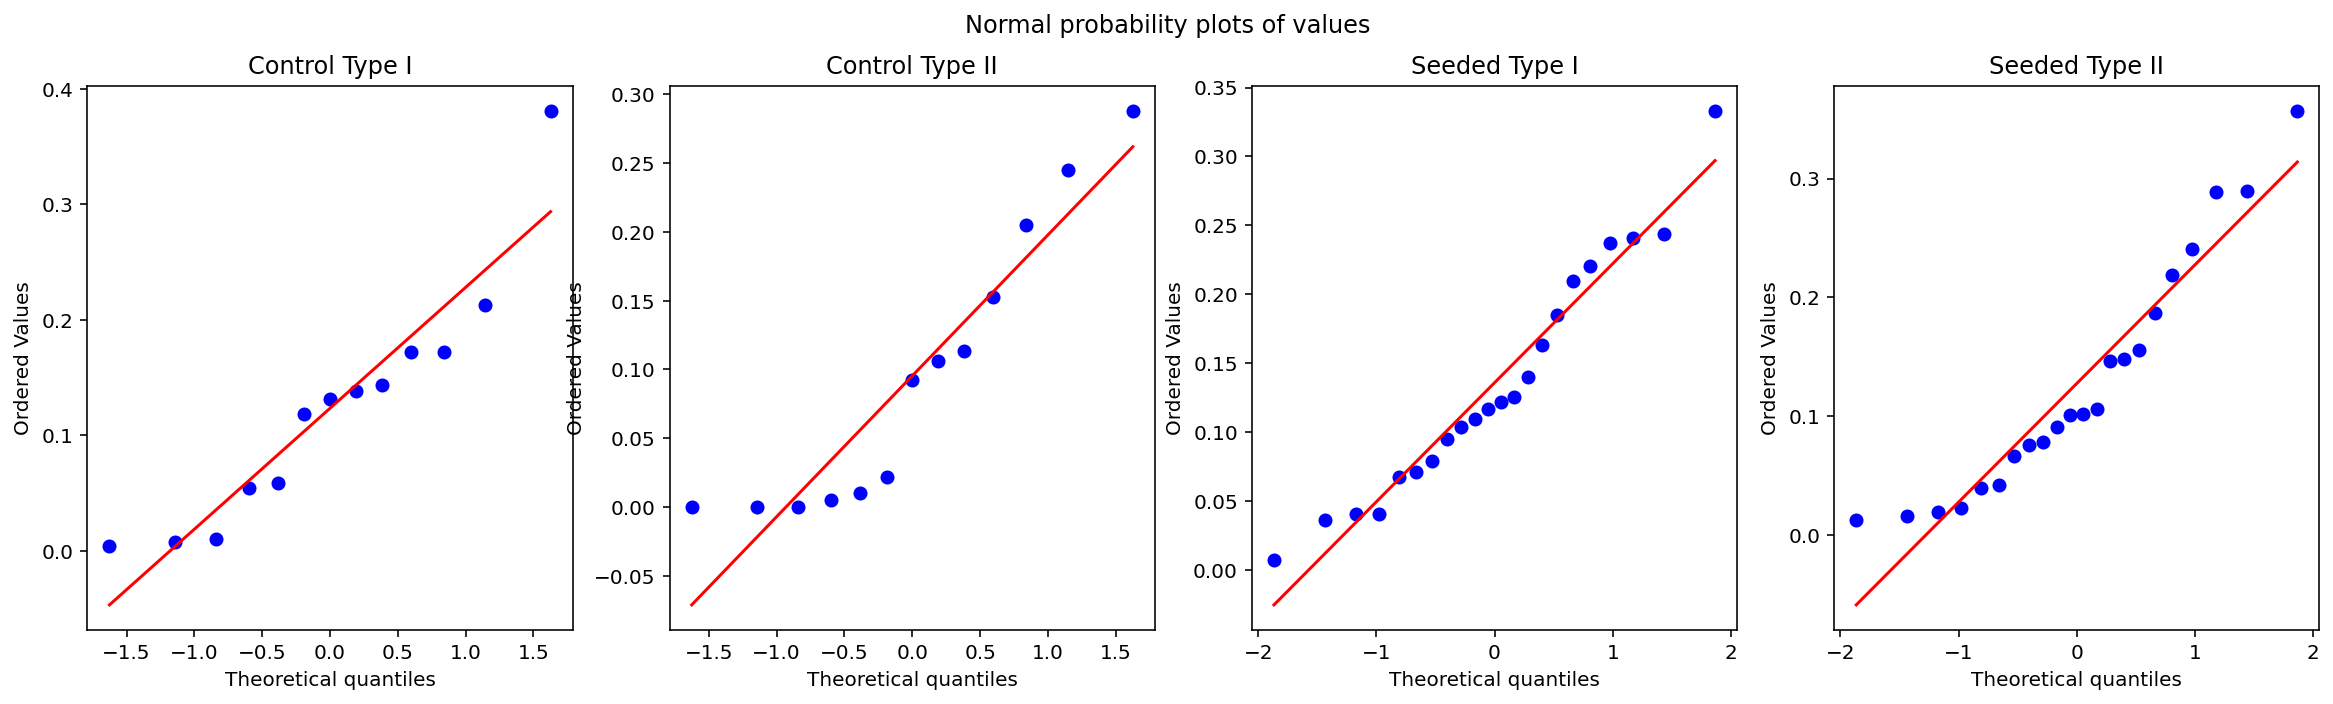

In [264]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('Normal probability plots of values')
stats.probplot(control['Type I'], plot=ax0)
stats.probplot(control['Type II'], plot=ax1)
ax0.set_title('Control Type I')
ax1.set_title('Control Type II')
stats.probplot(seeded['Type I'], plot=ax2)
stats.probplot(seeded['Type II'], plot=ax3)
ax2.set_title('Seeded Type I')
_  = ax3.set_title('Seeded Type II')

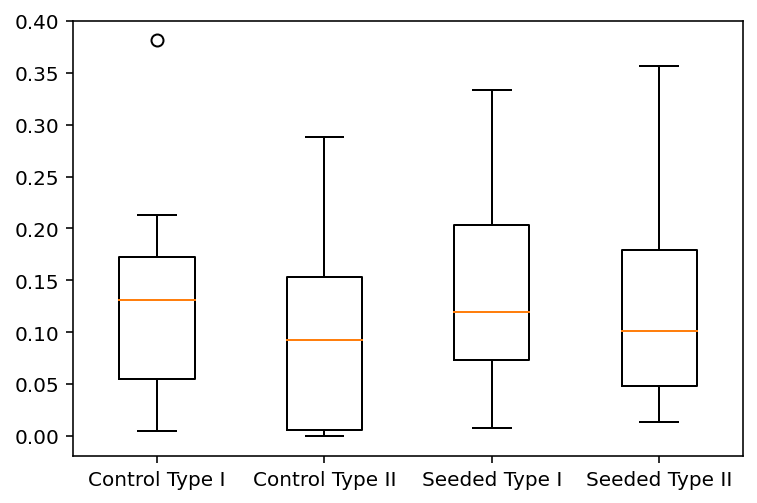

In [230]:
fig, ax = plt.subplots()
ax.boxplot([
    control['Type I'],
    control['Type II'],
    seeded['Type I'],
    seeded['Type II'],
], labels=[
    'Control Type I',
    'Control Type II',
    'Seeded Type I',
    'Seeded Type II',
])
plt.show()

The boxplots do not show significant differences.
The means of the seeded samples overlap with  the  values of their control counterparts. The  seeded samples have  longer  tails.

The normal probability plots   show that the  control data does not follow a normal distribution and the  sample sizes are relatively  small. For this  reason, a t  test may not be appropriate. It would seem safer to use a nonparametric method.

We use the Mann-Whitney test to test the null  hypothesis  that there is no difference in the control and  seeded samples.

We test Type I vs Type II separately.  i.e. we first compare 
`Control Type I vs Seeded Type I`
and then 
`Control Type II vs Seeded Type II`.

n = the number of control samples

m = the number of seeded samples

In [267]:
n = len(control)
m = len(seeded)
print('n = %s' % n)
print('m = %s' % m)

n = 13
m = 22


From Rice Section  11.2.3, a test statistic is calculated in the following way. First, we group all m + n observations together and rank them in order of increasing size.

Let $n_1$ be the smaller sample size and let R be the sum of the ranks from that sample. Let $R′ = n_1(m + n + 1) −  R$ and $R^* = min(R, R′)$.

In our case the smaller  sample is the control, so we compute R as the summed ranks of the control and $R′ = 13 (22 + 13 + 1) −  R$.


##### Test for Type I:

See computations below.
We can visually see there are no ties to worry about.

𝑅* = 𝑚𝑖𝑛(𝑅,𝑅′) = 221

From [these Wilcoxon Rank-Sum Tables](https://www.real-statistics.com/statistics-tables/wilcoxon-rank-sum-table-independent-samples/) we see 195 is the critical value for a two-tailed test with α = .2. 

We therefore do not have evidence to reject the null hypothesis.

In [285]:
type1 = pd.DataFrame({
    'value': control['Type I'],
    'sample': 'control',
}).append(pd.DataFrame({
    'value': seeded['Type I'],
    'sample': 'seeded',
})).sort_values('value').reset_index().drop('index', axis=1).reset_index().rename(
    columns={'index':'rank'}
)
type1['rank'] += 1

R = type1[type1['sample']=='control']['rank'].sum()
print('R = %s' % R)
R_prime = 13*(22+13+1) - 𝑅
print('𝑅′= 𝑛1(𝑚+𝑛+1)−𝑅 = %s' % R_prime)
R_star = min(R, R_prime)
print('𝑅* = 𝑚𝑖𝑛(𝑅,𝑅′) = %s' % R_star)

type1

R = 221
𝑅′= 𝑛1(𝑚+𝑛+1)−𝑅 = 247
𝑅* = 𝑚𝑖𝑛(𝑅,𝑅′) = 221


,rank,value,sample
0,1,0.0046,control
1,2,0.0072,seeded
2,3,0.0080,control
3,4,0.0106,control
4,5,0.0365,seeded
5,6,0.0403,seeded
6,7,0.0408,seeded
7,8,0.0549,control
8,9,0.0587,control
9,10,0.0676,seeded


##### Test for Type II:

See computations below.

There are 3 tied vaues of 0. We can assign them each the values of (1 + 2 + 3) / 3 = 2. However, since they are all in the same sample (control) this does not make a difference.

𝑅* = 𝑚𝑖𝑛(𝑅,𝑅′) = 199

From [these Wilcoxon Rank-Sum Tables](https://www.real-statistics.com/statistics-tables/wilcoxon-rank-sum-table-independent-samples/) we see 195 is the critical value for a two-tailed test with α = .2 and 176 is the critical. 

We therefore have a suggestion to reject the null hypothesis with 80% confidence for the type II target.

In [286]:
type2 = pd.DataFrame({
    'value': control['Type II'],
    'sample': 'control',
}).append(pd.DataFrame({
    'value': seeded['Type II'],
    'sample': 'seeded',
})).sort_values('value').reset_index().drop('index', axis=1).reset_index().rename(
    columns={'index':'rank'}
)
type2['rank'] += 1

R = type2[type2['sample']=='control']['rank'].sum()
print('R = %s' % R)
R_prime = 13*(22+13+1) - 𝑅
print('𝑅′= 𝑛1(𝑚+𝑛+1)−𝑅 = %s' % R_prime)
R_star = min(R, R_prime)
print('𝑅* = 𝑚𝑖𝑛(𝑅,𝑅′) = %s' % R_star)

type2

R = 199
𝑅′= 𝑛1(𝑚+𝑛+1)−𝑅 = 269
𝑅* = 𝑚𝑖𝑛(𝑅,𝑅′) = 199


,rank,value,sample
0,1,0.0000,control
1,2,0.0000,control
2,3,0.0000,control
3,4,0.0053,control
4,5,0.0100,control
5,6,0.0133,seeded
6,7,0.0163,seeded
7,8,0.0200,seeded
8,9,0.0220,control
9,10,0.0233,seeded


In general, there is weak evidence that seeding has an effect on either type of target.

### 13.24

Is it advantageous to wear the color red in a sporting contest? According to Hill and Barton (2005):
					
Although other colours are also present in animal displays, it is specifically the presence and intensity of red coloration that correlates with male dominance and testosterone levels. In humans, anger is associated with a reddening of the skin due to increased blood flow, whereas fear is as- sociated with increased pallor in similarly threatening situations. Hence, increased redness during aggressive interactions may reflect relative dominance. Because artificial stimuli can exploit innate responses to natural stimuli, we tested whether wearing red might influence the outcome of physical contests in humans.
					
In the 2004 Olympic Games, contestants in four combat sports (boxing, tae kwon do, Greco-Roman wrestling, and freestyle wrestling) were randomly assigned red or blue outfits (or body protectors). If colour has no effect on the outcome of contests, the number of winners wearing red should be statistically indistinguishable from the number of winners wearing blue.
					
They thus tabulated the colors worn by the winners in these contests: 


In [385]:
sports  = pd.DataFrame({
    'Sport':  ['Boxing','Freestyle Wrestling', 'Greco Roman Wrestling', 'Tae Kwon Do'],
    'Red': [148, 27, 25, 45,],
    'Blue': [120, 24, 23, 35],
}).set_index('Sport')
sports

,Red,Blue
Sport,,
Boxing,148,120
Freestyle Wrestling,27,24
Greco Roman Wrestling,25,23
Tae Kwon Do,45,35


In [386]:
sports['Total'] = sports['Red'] + sports['Blue']
sports.loc['Total'] = sports.sum()
sports

,Red,Blue,Total
Sport,,,
Boxing,148,120,268
Freestyle Wrestling,27,24,51
Greco Roman Wrestling,25,23,48
Tae Kwon Do,45,35,80
Total,245,202,447


Some supplementary information is given in the file red-blue.txt.

#### a. Let πR denote the probability that the contestant wearing red wins. Test the null hypothesis that πR = ½ versus the alternative hypothesis that πR is the same in each sport, but πR ≠ ½ .


The null and alternative hypothesis setup models a game as a Bernoulli trial where the probabilily of a win (success) is πR for any sport.

Since that is the case we can model the Bernoulli trial over the sum of all the games in all the sports.

There were n=447 total games, with r=245 wins by red. The probability of this with the null hypothesis that 

H0: πR = ½

is:

$Pr(X=r) = \binom{n}{r}p^r(1 - p)^{n-r}$

$Pr(X=245) = \binom{447}{245}0.5^{245}(0.5)^{202} = \binom{447}{245}0.5^{447} = 0.0048 $

We can therefore reject the null hypothesis with alpha = 0.01

Since n is large, we could also apply the Central limit Theorem and obtain the test statistic and its distribution under the null hypothesis:

$  Z = \frac{X - E(X)}{\sqrt{Var(X)}} $ 

Where Z --> N(0,1) as n --> ∞

In this case, $E(X) = n (π_R) = 447 (0.5) = 223.5$

$ \sqrt{Var(X)} = \sqrt{n (p)(1 - p)} $

$ Z = \frac{245 - 223.5}{\sqrt{447 (0.5)(0.5)}} = 2.03 $


$P(Z > 2) = .025 $

Since Z is symmetric, this coresponds to alpha = 0.05.

Again, we have evidence to reject the null hypothesis for the alternative hypothesis, with alpha = 0.05.

In [384]:
print('(447 choose 245) x (0.5)^447 = %s' % (scipy.special.comb(447, 245) * (0.5 ** 447)))

(447 choose 245) x (0.5)^447 = 0.004774706298173504


In [380]:
print('Z = %s' % ((245 - 223.5)/(np.sqrt(447*(0.5)*(0.5)))))

Z = 2.033830210313729


#### b. Test the null hypothesis πR = ½ against the alternative hypothesis that allows πR to be different in different sports, but not equal to ½.

Again, games are modeled as bernoulli trials, but this time the bernoulli trials are independent across sports. 

Since the minimum n (total games) from each sport is reasonably large, the probability of the outcome can be approximated with a normal distribution.

Since the $X^2$ distribution is defined as a sum of squared independent and identically distributed standard normal distributions, we can use the $X^2$ test statistic. The number of degrees of freedom are the different sports.

i.e.

$X_{k}^2 =  \sum_{i=1}^{k} \frac{(x_i - p_i n_i)^2}{n_i p_i (1 - p_i)} $

(The denominator is the definition of Var(X) squared)

In our case, we are testing the null hypothesis where:

$H_0: p_i = 0.5, i=1,2,3,4 $

$k = 4$

$n_i$ is the total number of games in each sport 

Tables show the $X^2$ critical value with 4 degrees of freedom is 7.78 for alpha=0.1 and 9.49 for alpha = 0.05. 

The test statistic value is 8.57.

There is evidence to reject the null hypothesis with 90% confidence, but not 95% confidence.

In [391]:
t = ( ((sports['Red'] - (0.5 * sports['Total']))**2) / (sports['Total'] * 0.5  * 0.5 )).sum()
print('chi-squared = %s' % t)

chi-squared = 8.571642380281773


#### C. Are either of these hypothesis tests equivalent to that which would test the null hypothesis  πR = ½    versus the alternative hypothesis πR ≠ ½ using as data the total numbers of wins summed over all the sports?

Yes, (A) was equivalent to this.

#### D. Is there any evidence  that wearing  red  is  more favorable in some of  the sports than others?

From Rice 13.3,

We can use a chi-squared test of homogeneity, modeling the outcomes of each of the 4  sports as (I=4) multinomial disitributions, each with J=2 cells.
We want to test the homogeneity of the multinomial distributions.

i.e. we want to test the null hypothesis vs the alternative:

$H_0 = π_{1,1} = π_{2,1} = π_{3,1} = π_{4,1}$ ($π_{i,2}$ is determinedd by $π_{i,1}$)

$H_1$ : Not all probabilities are as specified in $H_0$

$df = (I-1)(J-1) = 3$

$ X^2 = \sum_{i}^4 \sum_{j}^2 \frac{(O_{i,j} - E_{i,j})^2}{E_{i,j}} $

Where $E_{i,j} = \frac{n_{.j}n_{i.}}{n_{..}} $

The output expected frequencies from the following test are close to the observed frequencies.

The 10% point with 3 df is 6.25.

The data are consistent with the null hypothesis.

In [406]:
sports.drop('Total', axis=0).drop('Total', axis=1)

,Red,Blue
Sport,,
Boxing,148,120
Freestyle Wrestling,27,24
Greco Roman Wrestling,25,23
Tae Kwon Do,45,35


In [407]:
chi2, p, dof, ex = stats.chi2_contingency(sports.drop('Total', axis=0).drop('Total', axis=1))
assert(dof == 3)
print('chi-squared test statistic = %s' % chi2)
print('p = %s' % p)
print('\nexpected frequencies:')
pd.DataFrame(ex, columns=['Red','Blue'])

chi-squared test statistic = 0.3015017799642389
p = 0.9597457890114767

expected frequencies:


,Red,Blue
0,146.890380,121.109620
1,27.953020,23.046980
2,26.308725,21.691275
3,43.847875,36.152125


#### E. From an analysis of the points scored by winners and losers, Hill and Barton concluded that color had the greatest effect in close contests. Data on the points of each match are contained in the file red-blue.xls. Analyze this data and see whether you agree with their conclusion. 

Here we analyze the sports separately.  We compare the distribution of absolute difference in points scored and the number of Red vs Blue winners. A smaller absolute difference in points means a closer contest.

First we load the data for each sport, and plot the differences against wins.

In [452]:
def get_red_blue_points_differences(points_fpath):
    df =pd.read_csv(points_fpath)[
        ['Winner','Points Scored by Red', 'Points Scored by Blue']
    ].dropna()
    df['|Difference|'] = np.abs(df['Points Scored by Red'] - df['Points Scored by Blue'])
    return df

In [450]:
def plot_point_differences(df, name):
    fig, ax = plt.subplots(1,1)
    max_points_diff = df['|Difference|'].max()
    ax.hist(
        df[df['Winner']=='Red']['|Difference|'],
        alpha=0.5, color='red', label='Red wins (n=%s)'%len(df[df['Winner']=='Red']),
        bins=int(max_points_diff)
    )
    ax.hist(
        df[df['Winner']=='Blue']['|Difference|'], 
        alpha=0.5, color='blue', label='Blue wins (n=%s)'%len(df[df['Winner']=='Blue']),
        bins=int(max_points_diff)
    )
    ax.set_ylabel('Wins')
    ax.set_xlabel('Points difference')
    ax.legend()
    ax.set_title('%s: Point differences vs wins by Red and Blue' % name)
    plt.show()

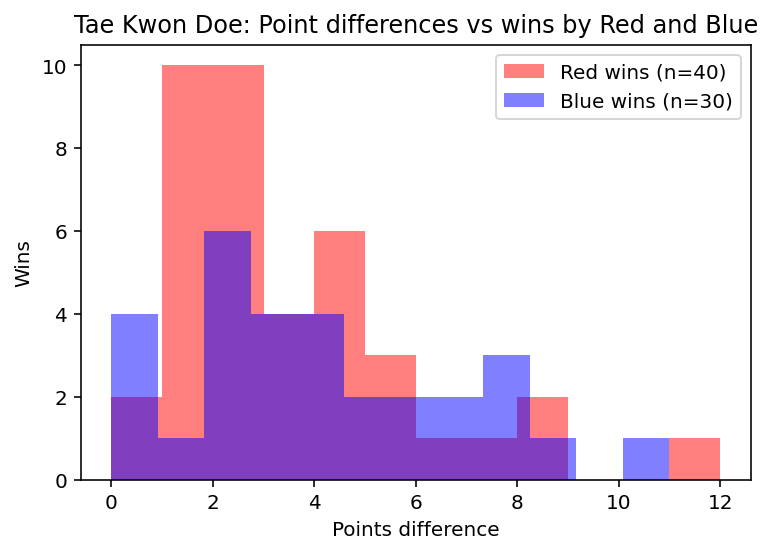

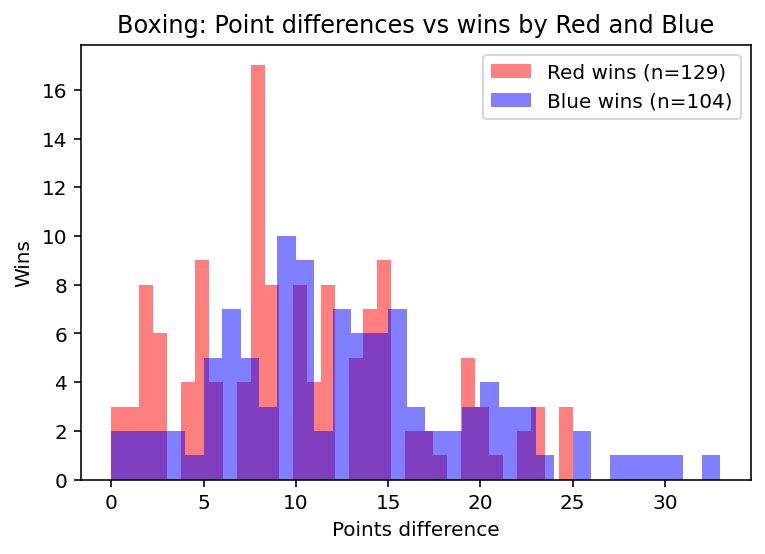

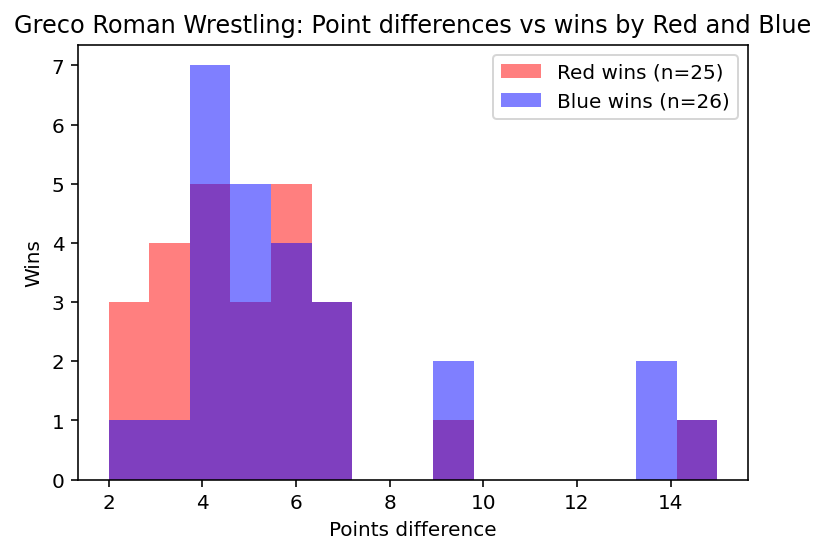

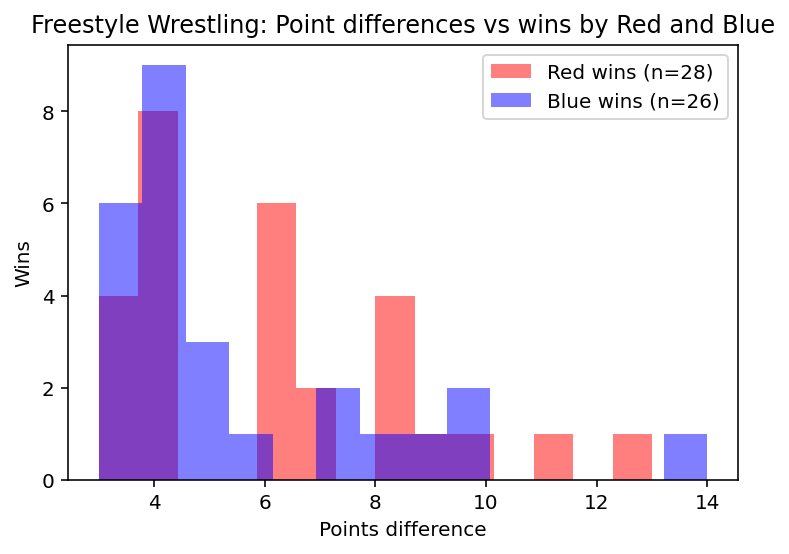

In [453]:
tkd = get_red_blue_points_differences('red-blue TKD.txt')
boxing = get_red_blue_points_differences('red-blue boxing.txt')
gr_wrestling = get_red_blue_points_differences('red-blue GR.txt')
fw_wrestling = get_red_blue_points_differences('red-blue FW.txt')
plot_point_differences(tkd, 'Tae Kwon Doe')
plot_point_differences(boxing, 'Boxing')
plot_point_differences(gr_wrestling, 'Greco Roman Wrestling')
plot_point_differences(fw_wrestling, 'Freestyle Wrestling')

It does appear that for each of the sports, *excluding* Freestyle Wrestling, the distribution of Red wins are skewed towards the smaller points differences, as compared to the Blue wins.

We already saw from previous tests (parts A and B) that Red has a statistically significant higher chance of winning (p > 0.5). However, maybe these extra wins are due to the close games.

Here we test a slightly different kind of hypothesis: Wearing Red vs Blue has an impact on how many points are scored over the opponent.

Well actually we test the opposite as the null hypothesis:

H0: The mean  difference in Red vs Blue points is 0.

If this is the case, then, as the researchers suggested, the Red wins might be due to an advantage in the close contests rather  than red having an impact on total point scoring.

As we can see above, the distribution of differences in points does not follow a normal distribution, so a non parametric test should be used.

We use the Wilcoxon signed-rank test on the observed differences, testing each sport separately.

From Rice Section 11.3:


The Wilcoxon signed-rank test statistic is W = min{W+, W−} , where W+ is the sum of signed ranks that are positive and W− is the sum of ranks whose signs are negative.

Since n > 20 for each sport, we use the normalized test statistic:

$ Z = \frac{W_+ - E(W_+)}{\sqrt{Var(W+)}} $

$ E(W_+) = \frac{n(n+1)}{4} $

$ Var(W_+) = \frac{n(n + 1)(2n + 1)}{24} $

When computing W+ we will consider Red wins as the positives (though  it doesn't make a difference), so that the sign of the differences is the sign of (Red points - Blue points).

In [514]:
def get_signed_ranks(df):
    """ 
    Assigns signed ranks and computes W+
    Returns W+, df
    """
    df = df.sort_values('|Difference|').reset_index(drop=True)
    # get the ranks, handling ties
    differences = df['|Difference|']
    ranks = []
    r = []
    for index, d in differences.items():
        if (index > 0) and (d > differences[index - 1]):
            ranks += [np.mean(r) for i in range(len(r))]
            r = []
        r += [index+1]
    ranks += [np.mean(r) for i in range(len(r))]
    df['Rank'] = ranks
    df['Signed Rank'] = df.apply(lambda r: r['Rank'] * (-1 if r['Winner'] == 'Blue' else 1), axis=1)
    w_plus = df[df['Signed Rank']>0]['Signed Rank'].sum()
    return w_plus, df

Tae Kwon Doe

In [519]:
w, tkd = get_signed_ranks(tkd)
n = len(tkd)
exp_w = (n*(n+1))/4
var_w = (n*(n+1)*((2*n)+1))/24
z = (w - exp_w)/(np.sqrt(var_w))
print('n = %s' % n)
print('W+ = %s' % w)
print('E(W+) = %s' % exp_w)
print('Var(W+) = %s' % var_w)
print('Z = %s' % z)
tkd.head()

n = 70
W+ = 1292.0
E(W+) = 1242.5
Var(W+) = 29198.75
Z = 0.2896830397843113


,Winner,Points Scored by Red,Points Scored by Blue,|Difference|,Rank,Signed Rank
0,Blue,2.0,2.0,0.0,3.5,-3.5
1,Red,6.0,6.0,0.0,3.5,3.5
2,Blue,9.0,9.0,0.0,3.5,-3.5
3,Blue,9.0,9.0,0.0,3.5,-3.5
4,Blue,9.0,9.0,0.0,3.5,-3.5


Boxing

In [521]:
w, boxing = get_signed_ranks(boxing)
n = len(boxing)
exp_w = (n*(n+1))/4
var_w = (n*(n+1)*((2*n)+1))/24
z = (w - exp_w)/(np.sqrt(var_w))
print('n = %s' % n)
print('W+ = %s' % w)
print('E(W+) = %s' % exp_w)
print('Var(W+) = %s' % var_w)
print('Z = %s' % z)
boxing.head()

n = 233
W+ = 13854.0
E(W+) = 13630.5
Var(W+) = 1060907.25
Z = 0.2169895498296029


,Winner,Points Scored by Red,Points Scored by Blue,|Difference|,Rank,Signed Rank
0,Red,43.0,43.0,0.0,3.0,3.0
1,Blue,19.0,19.0,0.0,3.0,-3.0
2,Blue,27.0,27.0,0.0,3.0,-3.0
3,Red,22.0,22.0,0.0,3.0,3.0
4,Red,18.0,18.0,0.0,3.0,3.0


Greco Roman Wrestling

In [525]:
w, gr_wrestling = get_signed_ranks(gr_wrestling)
n = len(gr_wrestling)
exp_w = (n*(n+1))/4
var_w = (n*(n+1)*((2*n)+1))/24
z = (w - exp_w)/(np.sqrt(var_w))
print('n = %s' % n)
print('W+ = %s' % w)
print('E(W+) = %s' % exp_w)
print('Var(W+) = %s' % var_w)
print('Z = %s' % z)
gr_wrestling.head()

n = 51
W+ = 580.5
E(W+) = 663.0
Var(W+) = 11381.5
Z = -0.773311016598475


,Winner,Points Scored by Red,Points Scored by Blue,|Difference|,Rank,Signed Rank
0,Blue,13,15,2,2.5,-2.5
1,Red,3,1,2,2.5,2.5
2,Red,3,1,2,2.5,2.5
3,Red,4,2,2,2.5,2.5
4,Blue,0,3,3,7.0,-7.0


Freestyle Wrestling

In [523]:
w, fw_wrestling = get_signed_ranks(fw_wrestling)
n = len(fw_wrestling)
exp_w = (n*(n+1))/4
var_w = (n*(n+1)*((2*n)+1))/24
z = (w - exp_w)/(np.sqrt(var_w))
print('n = %s' % n)
print('W+ = %s' % w)
print('E(W+) = %s' % exp_w)
print('Var(W+) = %s' % var_w)
print('Z = %s' % z)
fw_wrestling.head()

n = 54
W+ = 835.5
E(W+) = 742.5
Var(W+) = 13488.75
Z = 0.8007502737021251


,Winner,Points Scored by Red,Points Scored by Blue,|Difference|,Rank,Signed Rank
0,Blue,5,8,3,5.5,-5.5
1,Blue,2,5,3,5.5,-5.5
2,Blue,3,6,3,5.5,-5.5
3,Blue,6,9,3,5.5,-5.5
4,Red,6,3,3,5.5,5.5


There is not strong evidence to reject the null hypothesis for any of these sports.